<a href="https://colab.research.google.com/github/DhruvPaul10/Churn_Analysis/blob/main/ANN_churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [41]:
df = pd.read_csv('Churn_Modelling.csv')

In [42]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
df.drop(columns= ['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [44]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [46]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [48]:
X = df.drop(columns= 'Exited')
y = df['Exited']

In [49]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [50]:
X = pd.get_dummies(X, ['Gender', 'Geography'], dtype= int, drop_first= True)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.3, random_state= 42)

In [53]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Germany,Gender_Spain,Geography_Male
5525,624,51,10,123401.43,2,1,1,127825.25,0,0,1
771,717,31,4,129722.57,1,0,0,41176.60,0,0,1
7839,566,21,3,0.00,2,1,1,3626.47,0,0,0
2395,672,52,8,170008.84,1,0,0,56407.42,0,0,1
1478,649,45,5,92786.66,1,1,0,173365.90,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,0,0,0
5390,735,38,1,0.00,3,0,0,92220.12,0,0,0
860,667,43,8,190227.46,1,1,0,97508.04,0,0,1


In [54]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Germany,Gender_Spain,Geography_Male
6252,596,32,3,96709.07,2,0,0,41788.37,1,0,1
4684,623,43,1,0.00,2,1,1,146379.30,0,0,1
1731,601,44,4,0.00,2,1,0,58561.31,0,1,0
4742,506,59,8,119152.10,2,1,1,170679.74,1,0,1
4521,560,27,7,124995.98,1,1,1,114669.79,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
193,601,32,8,93012.89,1,1,0,86957.42,0,0,1
5611,625,42,6,100047.33,1,1,0,93429.95,1,0,1
2901,498,73,2,170241.70,2,1,1,165407.96,0,0,1
578,593,41,6,0.00,1,1,0,65170.66,0,0,0


In [55]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [56]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.utils as utils
from torch.utils.data import DataLoader, TensorDataset


Training with ReduceLROnPlateau scheduler:


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 10/100, Loss: 0.3530, LR: 0.010000
Epoch 20/100, Loss: 0.3420, LR: 0.010000
Epoch 30/100, Loss: 0.3292, LR: 0.010000
Epoch 40/100, Loss: 0.3163, LR: 0.010000
Epoch 50/100, Loss: 0.3090, LR: 0.010000
Epoch 60/100, Loss: 0.3044, LR: 0.010000
Epoch 70/100, Loss: 0.2906, LR: 0.005000
Epoch 80/100, Loss: 0.2892, LR: 0.005000
Epoch 90/100, Loss: 0.2861, LR: 0.005000
Epoch 100/100, Loss: 0.2749, LR: 0.002500


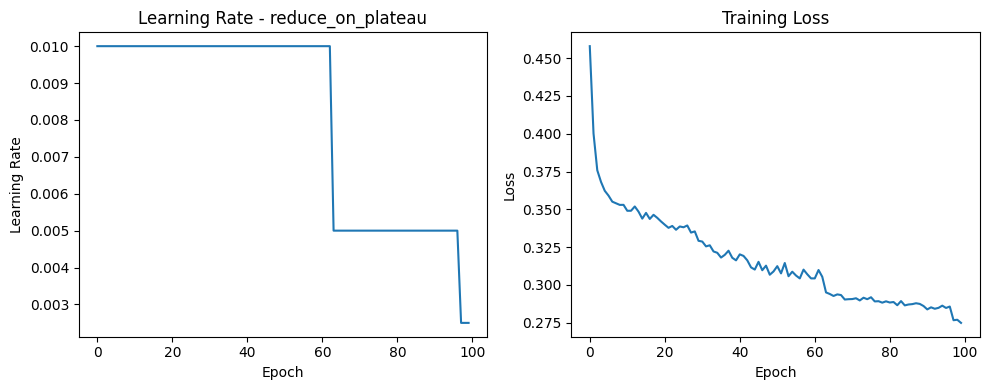


Evaluating final model:
Accuracy on test data: 84.57%

Training Sequential model with OneCycleLR scheduler:
Epoch 10/100, Loss: 0.3691, LR: 0.028015
Epoch 20/100, Loss: 0.3833, LR: 0.076031
Epoch 30/100, Loss: 0.3888, LR: 0.100000
Epoch 40/100, Loss: 0.3840, LR: 0.095038
Epoch 50/100, Loss: 0.3603, LR: 0.081156
Epoch 60/100, Loss: 0.3508, LR: 0.061103
Epoch 70/100, Loss: 0.3447, LR: 0.038851
Epoch 80/100, Loss: 0.3321, LR: 0.018807
Epoch 90/100, Loss: 0.3256, LR: 0.004942
Epoch 100/100, Loss: 0.3204, LR: 0.000000


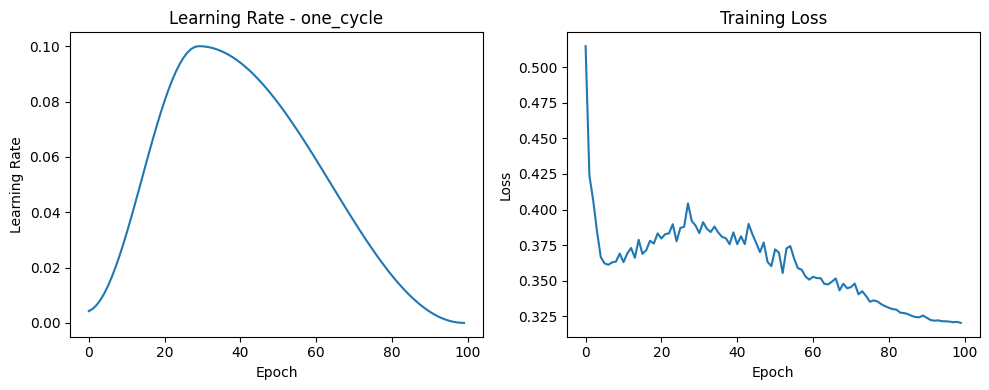


Evaluating Sequential model:
Accuracy on test data: 86.20%


In [57]:

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

# Convert target to appropriate format
try:
    y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
    y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
except AttributeError:
    # If y_train is not a pandas Series with a .values attribute
    y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# Define functional ANN model
class ANN(nn.Module):
    def __init__(self, input_size, hidden_size=32, output_size=1):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        # No activation in the output layer (we'll use BCEWithLogitsLoss)
        x = self.fc2(x)
        return x

# Define sequential ANN model
def create_sequential_model(input_size, hidden_size=32, output_size=1):
    model = nn.Sequential(
        nn.Linear(input_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, output_size)
    )
    return model

# Function to train model with different learning rate schedulers
def train_with_scheduler(model, train_loader, scheduler_type='none', epochs=100,
                        lr=0.01, plot_lr=True, verbose=True):
    # Initialize optimizer
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Initialize loss function (BCEWithLogitsLoss combines sigmoid and BCE for numerical stability)
    criterion = nn.BCEWithLogitsLoss()

    # Initialize the appropriate scheduler
    scheduler = None
    if scheduler_type == 'step':
        # Step LR: decays the learning rate by gamma every step_size epochs
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
    elif scheduler_type == 'multistep':
        # MultiStepLR: decays the learning rate at specific milestones by gamma
        scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[15, 40, 75], gamma=0.5)
    elif scheduler_type == 'exponential':
        # ExponentialLR: decays the learning rate exponentially by gamma each epoch
        scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
    elif scheduler_type == 'cosine':
        # CosineAnnealingLR: reduces learning rate following a cosine curve
        scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
    elif scheduler_type == 'reduce_on_plateau':
        # ReduceLROnPlateau: reduces learning rate when a metric plateaus
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5,
                                                        patience=5, verbose=verbose)
    elif scheduler_type == 'one_cycle':
        # OneCycleLR: implements the 1cycle policy
        total_steps = epochs * len(train_loader)
        scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=lr*10,
                                                total_steps=total_steps)
    elif scheduler_type == 'cyclic':
        # CyclicLR: cycles the learning rate between two boundaries
        scheduler = optim.lr_scheduler.CyclicLR(optimizer, base_lr=lr/10, max_lr=lr,
                                             step_size_up=5*len(train_loader), mode='triangular2')
    elif scheduler_type == 'cosine_restart':
        # CosineAnnealingWarmRestarts: cosine annealing with restarts
        scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2)

    # Keep track of losses and learning rates for plotting
    losses = []
    learning_rates = []

    # Training loop
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Update learning rates for schedulers that update per batch
            if scheduler_type in ['one_cycle', 'cyclic']:
                scheduler.step()

            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        losses.append(epoch_loss)

        # Get current learning rate
        current_lr = optimizer.param_groups[0]['lr']
        learning_rates.append(current_lr)

        # Update learning rate scheduler (those that update per epoch)
        if scheduler is not None:
            if scheduler_type == 'reduce_on_plateau':
                scheduler.step(epoch_loss)
            elif scheduler_type not in ['one_cycle', 'cyclic']:
                scheduler.step()

        # Print epoch results
        if verbose and (epoch+1) % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, LR: {current_lr:.6f}')

    # Plot learning rate over epochs if requested
    if plot_lr and scheduler is not None:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.plot(learning_rates)
        plt.title(f'Learning Rate - {scheduler_type}')
        plt.xlabel('Epoch')
        plt.ylabel('Learning Rate')

        plt.subplot(1, 2, 2)
        plt.plot(losses)
        plt.title('Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')

        plt.tight_layout()
        plt.show()

    return model, losses, learning_rates

# Function to evaluate model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            # Get raw logits
            outputs = model(inputs)
            # Apply sigmoid to convert to probabilities
            predicted_probs = torch.sigmoid(outputs)
            # Convert probabilities to binary predictions
            predicted = (predicted_probs > 0.5).float()

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on test data: {accuracy:.2f}%')
    return accuracy

# Initialize input size from data
input_size = X_train.shape[1]

# Demo: Train models with different schedulers
schedulers_to_try = [
    'none',              # No scheduler (constant learning rate)
    'step',              # StepLR
    'multistep',         # MultiStepLR
    'exponential',       # ExponentialLR
    'cosine',            # CosineAnnealingLR
    'reduce_on_plateau', # ReduceLROnPlateau
    'one_cycle',         # OneCycleLR
    'cyclic',            # CyclicLR
    'cosine_restart'     # CosineAnnealingWarmRestarts
]

# Function to compare all schedulers
def compare_schedulers(schedulers=schedulers_to_try, epochs=50):
    results = {}

    for scheduler_type in schedulers:
        print(f"\n--- Training with {scheduler_type} scheduler ---")

        # Create a fresh model
        model = ANN(input_size)

        # Train with the scheduler
        model, losses, lrs = train_with_scheduler(
            model,
            train_loader,
            scheduler_type=scheduler_type,
            epochs=epochs,
            plot_lr=False,  # Don't plot each one individually
            verbose=False
        )

        # Evaluate
        accuracy = evaluate_model(model, test_loader)

        # Store results
        results[scheduler_type] = {
            'model': model,
            'losses': losses,
            'learning_rates': lrs,
            'accuracy': accuracy
        }

    # Plot comparison of all learning rate schedules
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 1, 1)
    for name, data in results.items():
        plt.plot(data['learning_rates'], label=name)
    plt.title('Learning Rate Schedules')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.legend()

    plt.subplot(2, 1, 2)
    for name, data in results.items():
        plt.plot(data['losses'], label=f"{name} (Acc: {data['accuracy']:.1f}%)")
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return results

# Usage example:
# results = compare_schedulers(epochs=50)

# Example usage of a specific scheduler
print("\nTraining with ReduceLROnPlateau scheduler:")
model = ANN(input_size)
model, losses, lrs = train_with_scheduler(
    model,
    train_loader,
    scheduler_type='reduce_on_plateau',
    epochs=100,
    lr=0.01,
    plot_lr=True
)

# Evaluate the model
print("\nEvaluating final model:")
accuracy = evaluate_model(model, test_loader)

# Example of using a scheduler with the Sequential API model
print("\nTraining Sequential model with OneCycleLR scheduler:")
seq_model = create_sequential_model(input_size)
seq_model, seq_losses, seq_lrs = train_with_scheduler(
    seq_model,
    train_loader,
    scheduler_type='one_cycle',
    epochs=100,
    lr=0.01,
    plot_lr=True
)

# Evaluate the sequential model
print("\nEvaluating Sequential model:")
seq_accuracy = evaluate_model(seq_model, test_loader)

# To compare all schedulers, uncomment the following line:
# results = compare_schedulers(epochs=50)